In [60]:
import pandas as pd

df = pd.read_csv("D:/치안빅데이터/데이터/전처리완료.CSV", encoding='euc-kr')
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,접수부서,경찰청구분,사건상태,사건종별,신고성별,발생지점,발생좌표x,발생좌표y,접수완료날짜,접수완료시간대,접수연도,접수월,접수일자,접수완료시간,광역시/도,시군구,읍면동
0,충남청,19,10,401,2,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,20/12/01,08:17:50,20,12,1,8,충청남도,천안시,서북구
1,대전청,13,10,406,1,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,20/12/01,03:24:26,20,12,1,3,대전광역시,유성구,봉명동(행정:온천1동)
2,충남청,19,10,402,1,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,20/12/01,07:37:18,20,12,1,7,충청남도,천안시,서북구
3,대전청,13,10,401,1,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,20/12/01,07:08:44,20,12,1,7,대전광역시,중구,석교동(석교동)
4,대전청,13,10,401,2,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,20/12/01,07:09:20,20,12,1,7,대전광역시,중구,석교동(행정:석교동)


In [15]:
for i in range(1,4):
    print(df.iloc[:,i].unique())

[19 13 31 18 15 20  8 17 11 16 21 22 23 10 12  9]
[10  3  5  2  9]
[401 406 402 403 405 404]


#### 사건 상태는 10번인 것만 이용
#### 경찰청 구분은 호서 지역인 대전(13), 충남(19), 세종(31)만 사용
#### 사건종별은 400번대만 사용 (교통 관련 사고)

In [61]:
df = df[df['사건상태']==10]

In [62]:
a = df['경찰청구분'] == 19
b = df['경찰청구분'] == 13
c = df['경찰청구분'] == 31

df = df[a|b|c]

In [63]:
df = df.reset_index(drop=True)

In [22]:
df.columns

Index(['접수부서', '경찰청구분', '사건상태', '사건종별', '신고성별', '발생지점', '발생좌표x', '발생좌표y',
       '접수완료날짜', '접수완료시간대', '접수연도', '접수월', '접수일자', '접수완료시간', '광역시/도', '시군구',
       '읍면동'],
      dtype='object')

In [52]:
df['시군구'].value_counts()

천안시     51702
서구      33474
아산시     23588
유성구     23471
세종시     16833
중구      16107
동구      15309
대덕구     13732
당진시     13653
서산시     12026
공주시      9880
논산시      8385
보령시      8220
홍성군      6571
예산군      4992
태안군      4095
금산군      2794
부여군      2633
서천군      2607
계룡시      1361
청양군      1256
조치원읍       22
아름동        10
부강면         6
금남면         5
어진동         5
다정동         5
고운동         4
반곡동         3
연기면         3
나성동         3
종촌동         3
전의면         3
한솔동         2
연서면         2
장군면         2
대평동         2
가람동         2
새롬동         2
보람동         2
전동면         1
소담동         1
도담동         1
소정면         1
당진군         1
Name: 시군구, dtype: int64

#### 시군구 칼럼에 동이 들어간 자료가 50개 정도 있다 -> 제거 

In [64]:
counts = df['시군구'].value_counts()
df = df[df['시군구'].isin(counts[counts >= 10].index)]

In [142]:
df2 = df.groupby(['사건종별','접수완료시간','광역시/도','시군구','읍면동']).size().reset_index(name='발생횟수')
df2.sort_values(by='발생횟수',ascending=False)

,사건종별,접수완료시간,광역시/도,시군구,읍면동,발생횟수
11641,401,18,충청남도,천안시,서북구,1196
10866,401,17,충청남도,천안시,서북구,1127
12370,401,19,충청남도,천안시,서북구,1017
13732,401,21,충청남도,천안시,서북구,970
11640,401,18,충청남도,천안시,동남구,969
...,...,...,...,...,...,...
6186,401,11,충청남도,서산시,갈산동(부춘동),1
24531,403,8,세종특별자치시,세종시,도담동(도담동),1
24533,403,8,세종특별자치시,세종시,부강면,1
24534,403,8,세종특별자치시,세종시,산울동,1


In [146]:
k = df.groupby(['사건종별','접수완료시간','광역시/도','시군구','발생지점']).size().reset_index(name='발생횟수')
k.sort_values(by='발생횟수',ascending=False)

,사건종별,접수완료시간,광역시/도,시군구,발생지점,발생횟수
197670,403,21,대전광역시,동구,대전광역시 동구 판암동 (판암2동 ) 242,19
198942,403,22,대전광역시,동구,대전광역시 동구 판암동 (판암2동 ) 242,15
172403,402,18,대전광역시,유성구,대전광역시 유성구 봉명동 (행정:원신흥동),14
154475,402,9,충청남도,아산시,충청남도 아산시 배방읍 구령리(배방읍) 579-19,14
173389,402,18,충청남도,서산시,충청남도 서산시 예천동(석남동) 1299-7,12
...,...,...,...,...,...,...
85101,401,16,대전광역시,서구,대전광역시 서구 둔산동 (둔산2동 ) 1161,1
85104,401,16,대전광역시,서구,대전광역시 서구 둔산동 (둔산2동 ) 1203,1
85105,401,16,대전광역시,서구,대전광역시 서구 둔산동 (둔산2동 ) 1257,1
85106,401,16,대전광역시,서구,대전광역시 서구 둔산동 (둔산2동 ) 1260,1


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


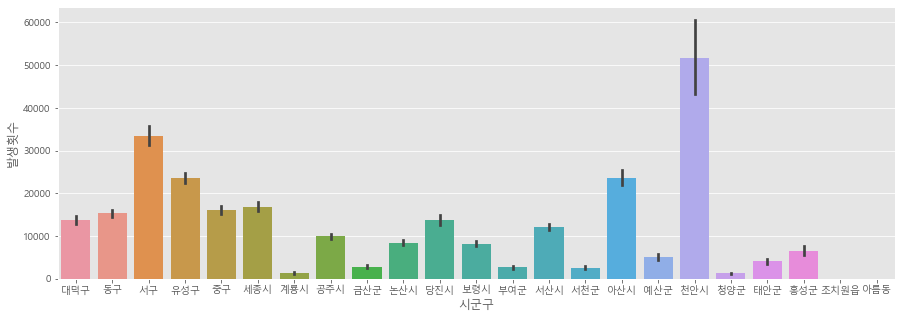

In [99]:
plt.figure(figsize=(15,5))
sns.barplot(x='시군구',y='발생횟수',data=df1, estimator=sum)
plt.show();

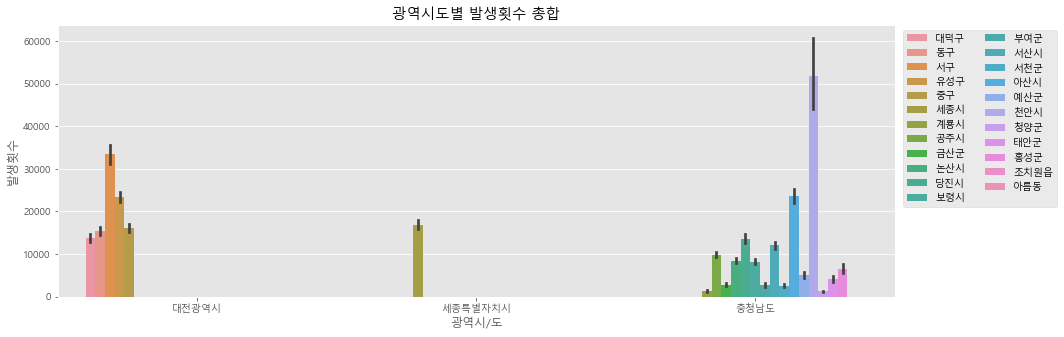

In [122]:
plt.figure(figsize=(15,5))
sns.barplot(x='광역시/도',y='발생횟수', hue='시군구', data=df1, estimator=sum)
plt.title('광역시도별 발생횟수 총합')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=2)
plt.show();

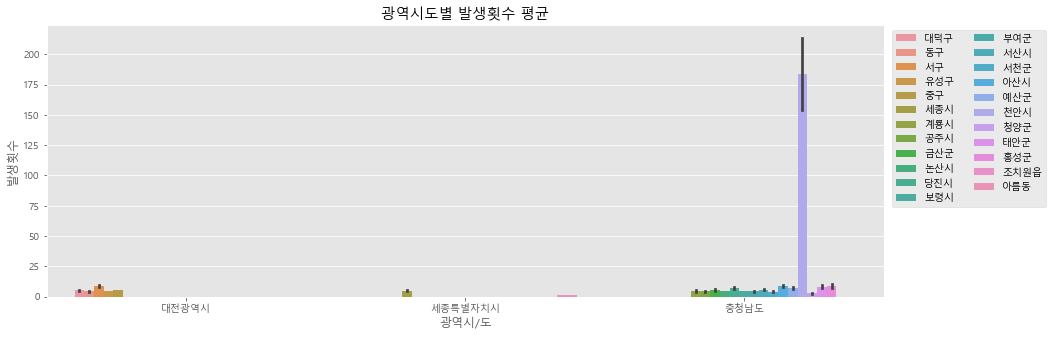

In [123]:
plt.figure(figsize=(15,5))
sns.barplot(x='광역시/도',y='발생횟수', hue='시군구', data=df1)
plt.title('광역시도별 발생횟수 평균')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=2)
plt.show();

In [103]:
ch = df[df['시군구'] =='천안시']

In [133]:
d = ch.groupby(['사건종별','신고성별','접수완료시간','발생좌표x','발생좌표y','읍면동']).size().reset_index(name='발생횟수')
d['발생횟수'].unique()

array([ 1,  2,  3,  4,  5,  6, 11,  7,  9], dtype=int64)

In [136]:
d=ch.groupby(['사건종별','접수완료시간','발생좌표x','발생좌표y','읍면동']).size().reset_index(name='발생횟수')

In [137]:
d.sort_values(by='발생횟수',ascending=False)

,사건종별,접수완료시간,발생좌표x,발생좌표y,읍면동,발생횟수
31800,402,19,127.137808,36.830373,서북구,14
41217,406,4,127.139080,36.827588,서북구,10
31375,402,18,127.137808,36.830373,서북구,9
29747,402,14,127.137808,36.830373,서북구,8
15771,401,16,127.173667,36.787582,동남구,8
...,...,...,...,...,...,...
16422,401,17,127.124219,36.787441,동남구,1
16423,401,17,127.124229,36.787082,동남구,1
16424,401,17,127.124270,36.800650,서북구,1
16425,401,17,127.124301,36.793324,서북구,1


In [105]:
ch1 = ch.groupby(['사건종별','신고성별','접수완료시간','시군구','읍면동']).size().reset_index(name='발생횟수')
ch1

,사건종별,신고성별,접수완료시간,시군구,읍면동,발생횟수
0,401,1,0,천안시,동남구,224
1,401,1,0,천안시,서북구,516
2,401,1,1,천안시,동남구,164
3,401,1,1,천안시,서북구,382
4,401,1,2,천안시,동남구,103
...,...,...,...,...,...,...
665,406,3,21,천안시,성거읍,2
666,406,3,22,천안시,동남구,62
667,406,3,22,천안시,서북구,101
668,406,3,23,천안시,동남구,51


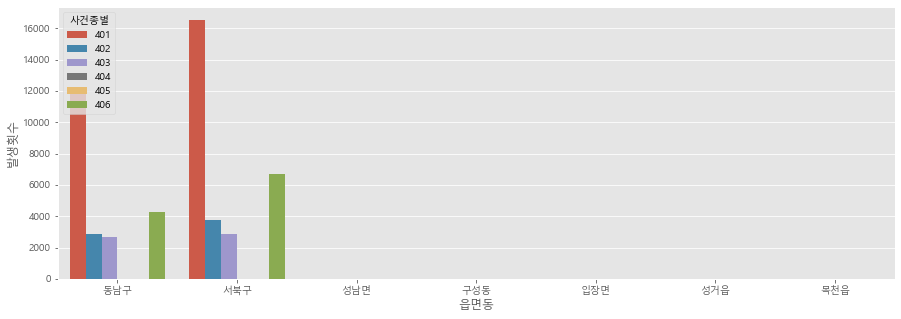

In [124]:
plt.figure(figsize=(15,5))
sns.barplot(data=ch1,x='읍면동',y='발생횟수', hue= '사건종별', ci=None,estimator=sum)
plt.show();

In [ ]:
plt.plot